In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from numpy.lib.shape_base import expand_dims

# De Jong function n. 2

In [ ]:
# definition of the De Jong function number 2
def DJ2(x):
  """
  the function takes as input a numpy array x with dimension (n, )
  It returns the evaluation of the De Jong function number 2.
  global minimum DF2(x*)=0
  global arg-minimum x*(i)=1,   i=1:n  
  """
  r = 0
  for i in range(x.shape[0] -1):
    r += 100 * (x[i + 1] - x[i]**2)**2 + (1 - x[i])**2
  return r

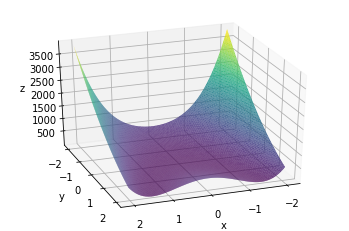

In [ ]:
# 3D-plot of the De Jong function in a two dimensional space, recall that DF2 can be evaluated in any dimension N
x = np.linspace(-2.048, 2.048, 100) # it creates an array with 100 items equally spaced between -2.048, 2.048
y = np.linspace(-2.048, 2.048, 100) 
X, Y = np.meshgrid(x, y) # meshgrid copies vector x and y in such a way to create couples between each item in a grid

# data is an array with dimension (10000, 2) 
data = np.concatenate([np.expand_dims(X.flatten(), 1), np.expand_dims(Y.flatten(), 1)], 1)
Z = np.apply_along_axis(DJ2, 1, data).reshape(100, 100) # Z is the array with evaluation of all the points in the domain of DJ2

# plot the 3D function
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), Z.flatten(), cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(30, 70);

# De Jong function n. 3

In [ ]:
# definition of the De Jong function number 3
def DJ3(x):
  """
  the function takes as input a numpy array x with dimension (n, )
  It returns the evaluation of the De Jong function number 3.
  global minimum DJ3(x*)=0
  global arg-minimum x*(i)=0,   i=1:n
  """
  return 6*len(x) + np.sum(np.ceil(x))

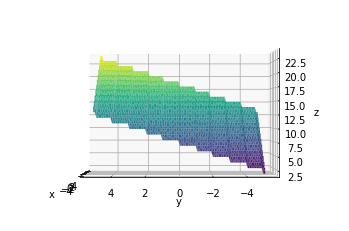

In [ ]:
# plot of the De Jong function in a two dimensional space, recall that DF2 can be evaluated in any dimension N
x = np.linspace(-2.048, 2.048, 100) # it creates an array with 100 items equally spaced between -2.048, 2.048
y = np.linspace(-2.048, 2.048, 100) 
X, Y = np.meshgrid(x, y) # meshgrid copies vector x and y in such a way to create couples between each item

# data is an array with dimension (10000, 2) 
data = np.concatenate([np.expand_dims(X.flatten(), 1), np.expand_dims(Y.flatten(), 1)], 1)
Z = np.apply_along_axis(DJ3, 1, data).reshape(100, 100) # Z is the array with evaluation of all the points in the domain of DJ2

# plot od the function
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), Z.flatten(), cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(0, 180);# 60 degrees above x-y and 35 degrees counter-clockwise rotation

# De Jong function n. 5

In [ ]:
# definition of the De Jong function number 5
a_up = np.tile([-32, -16, 0, 16, 32], 5)
a_down = np.transpose(np.tile([-32, -16, 0, 16, 32], (5, 1))).flatten()
a = np.stack([a_up, a_down])

def DJ5(x):
  """
  global minimum f(x*)=1
  minimum x*(0)=-32, x*(1)=-32  
  """
  d = 0.002
  for i in range(25):
    d += 1 / (i + 1 + (x[0] - a[0][i]) ** 6 + (x[1] - a[1][i]) ** 6)
  return 1 / d

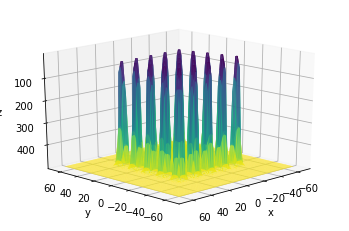

In [ ]:
# plot of the De Jong function in a two dimensional space, recall that DF2 can be evaluated in any dimension N
x = np.linspace(-2.048, 2.048, 100) # it creates an array with 100 items equally spaced between -2.048, 2.048
y = np.linspace(-2.048, 2.048, 100) 
X, Y = np.meshgrid(x, y) # meshgrid copies vector x and y in such a way to create couples between each item

# data is an array with dimension (10000, 2) 
data = np.concatenate([np.expand_dims(X.flatten(), 1), np.expand_dims(Y.flatten(), 1)], 1)
Z = np.apply_along_axis(DJ5, 1, data).reshape(100, 100) # Z is the array with evaluation of all the points in the domain of DJ2

# plot od the function
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_trisurf(X.flatten(), Y.flatten(), Z.flatten(), cmap='viridis', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(-160, 135);

# Meta-Heuristic

## Particle Swarm Optimization


In [ ]:
#install the library used to run the Particle Swarm Optimization
!pip install pyswarms

In [ ]:
from attr.validators import max_len
from time import time
import pandas as pd
from IPython.display import HTML
import pyswarms as ps


dimension = 2
fun = DJ2
vfun = lambda data: np.apply_along_axis(fun, 1, data)
real_opt = 0

tolerance = 1e-9
value_bound = 2.048
max_bound  = value_bound * np.ones(dimension)
min_bound = -max_bound
bnds = (min_bound, max_bound)
n_particles = 10 * dimension
iterations = 10000

# Set-up hyperparameters
options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=n_particles, dimensions=dimension, 
                                    options=options, bounds=bnds)

# Perform optimization
cost, pos = optimizer.optimize(vfun, iters=iterations)
print(cost, pos)

2022-05-12 14:46:23,278 - pyswarms.single.global_best - INFO - Optimize for 10000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10000/10000, best_cost=3.74e-6
2022-05-12 14:47:00,411 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 3.7412125644375756e-06, best pos: [0.99806696 0.9961309 ]


3.7412125644375756e-06 [0.99806696 0.9961309 ]


In [ ]:
# let's make some statistics
data_experiments = {"dimension": [2, 3, 4, 5, 6, 7, 8, 9,10],  
                    "avg fev":[],
                    "std fev": [],
                    "success rate": [],
                    "avg nfev": [],
                    "std nfev": [],
                    "avg iter": []
                    }

start = time()
for dimension in data_experiments["dimension"]:
  succes_rate = 0
  avg_fun = []
  avg_nfev = []
  avg_it = []
  max_bound  = value_bound * np.ones(dimension)
  min_bound = -max_bound
  bnds = (min_bound, max_bound)
  n_particles = 10 * dimension
  
  for _ in range(10):
    optimizer = ps.single.GlobalBestPSO(n_particles=n_particles, 
                                        dimensions=dimension,
                                        options=options, 
                                        bounds=bnds)
    cost, pos = optimizer.optimize(vfun, iters=1000, verbose=False)
    avg_fun.append(cost)
    avg_nfev.append(iterations*n_particles)
    avg_it.append(iterations)
    if np.abs(cost - real_opt) < 1e-6:
      succes_rate += 1
     
  data_experiments["success rate"].append(f"{succes_rate}/10")
  data_experiments["avg fev"].append(np.mean(avg_fun))
  data_experiments["std fev"].append(np.std(avg_fun))
  data_experiments["avg nfev"].append(np.mean(avg_nfev))
  data_experiments["std nfev"].append(np.std(avg_nfev))
  data_experiments["avg iter"].append(np.mean(avg_it))

print("total time used for the experiments: ", round(time() - start, 2))

table = pd.DataFrame(data_experiments)
HTML(table.to_html(index=False))

total time used for the experiments:  108.1


dimension,avg fev,std fev,success rate,avg nfev,std nfev,avg iter
2,6.600288e-06,1.980086e-05,9/10,200000.0,0.0,10000.0
3,7.432147e-08,1.039132e-07,10/10,300000.0,0.0,10000.0
4,9.696086e-04,2.899856e-03,2/10,400000.0,0.0,10000.0
5,1.514444e-04,3.162115e-04,1/10,500000.0,0.0,10000.0
6,4.637221e-03,1.342992e-02,0/10,600000.0,0.0,10000.0
7,7.066842e-04,8.890842e-04,0/10,700000.0,0.0,10000.0
8,9.538646e-01,9.609680e-01,0/10,800000.0,0.0,10000.0
9,1.338167e+00,1.261075e+00,0/10,900000.0,0.0,10000.0
10,2.467783e+00,1.956603e+00,0/10,1000000.0,0.0,10000.0


In [ ]:
# Now it's the time to implement the Coordinate Descent on functions n.2 and n.5

## Genetic Algorithm

In [ ]:
!pip install pygad

In [ ]:
from time import time
import pandas as pd
from IPython.display import HTML
import pygad



dimension = 2
fun = DJ2
real_opt = 0
tolerance = 1e-9
bnds = [-2.048, 2.048]

def fitness_func(solution, solution_idx):
    output = fun(solution)
    fitness = - np.abs(output - real_opt)
    return fitness

fitness_function = fitness_func

num_generations = 10000
num_parents_mating = 4

sol_per_pop = 20 * dimension
num_genes = dimension

value_bound = 2.048
max_bound  = value_bound 
min_bound = -max_bound

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = None
mutation_percent_genes = 1

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=min_bound,
                       init_range_high=max_bound,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

ga_instance.run()

solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

Parameters of the best solution : [0.4831681  0.30832128]
Fitness value of the best solution = -0.8276648749529494


In [ ]:
# let's make some statistics

data_experiments = {"dimension": [2, 3, 4, 5, 6, 7, 8, 9,10],  
                    "avg fev":[],
                    "std fev": [],
                    "success rate": [],
                    "avg nfev": [],
                    "std nfev": [],
                    "avg iter": []
                    }

start = time()
for dimension in data_experiments["dimension"]:
  succes_rate = 0
  avg_fun = []
  avg_nfev = []
  avg_it = []
  for _ in range(10):
    ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       init_range_low=min_bound,
                       init_range_high=max_bound,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

    ga_instance.run()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    cost = fun(solution)
    avg_fun.append(cost)
    avg_nfev.append(num_generations*sol_per_pop)
    avg_it.append(num_generations)
    if np.abs(cost - real_opt) < 1e-6:
      succes_rate += 1
     
  data_experiments["success rate"].append(f"{succes_rate}/10")
  data_experiments["avg fev"].append(np.mean(avg_fun))
  data_experiments["std fev"].append(np.std(avg_fun))
  data_experiments["avg nfev"].append(np.mean(avg_nfev))
  data_experiments["std nfev"].append(np.std(avg_nfev))
  data_experiments["avg iter"].append(np.mean(avg_it))

print("total time used for the experiments: ", round(time() - start, 2))

table = pd.DataFrame(data_experiments)
HTML(table.to_html(index=False))

total time used for the experiments:  1124.27


dimension,avg fev,std fev,success rate,avg nfev,std nfev,avg iter
2,1.083171,1.100935,0/10,400000.0,0.0,10000.0
3,1.846206,2.548740,0/10,400000.0,0.0,10000.0
4,1.656437,1.532972,0/10,400000.0,0.0,10000.0
5,2.452641,3.327218,0/10,400000.0,0.0,10000.0
6,1.914488,1.259782,0/10,400000.0,0.0,10000.0
7,2.731428,2.814267,0/10,400000.0,0.0,10000.0
8,1.147727,0.807205,0/10,400000.0,0.0,10000.0
9,2.547215,1.404593,0/10,400000.0,0.0,10000.0
10,1.546860,1.611147,0/10,400000.0,0.0,10000.0


In [ ]:
# Now it's the time to implement the Coordinate Descent on functions n.2 and n.5